<font size="4">Imorting required modules</font>

In [37]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

<font size="4">Loading Iris dataset from sklearn</font>

In [38]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

<font size="4">Implementing Genetic Algorithm Steps</font>

In [39]:
# Define genetic algorithm parameters
pop_size = 10
num_generations = 50
mutation_rate = 0.1
num_clusters = 3  # Number of clusters

# Initialize population of cluster centers
def initialize_population(pop_size, num_clusters, data_dim):
    return np.random.rand(pop_size, num_clusters, data_dim)

# Assign data points to the nearest cluster center
def assign_clusters(data, cluster_centers):
    distances = pairwise_distances_argmin_min(data, cluster_centers)[0]
    return distances

# Evaluate fitness based on sum of squared distances
def evaluate_fitness(data, cluster_centers):
    assigned_clusters = assign_clusters(data, cluster_centers)
    distances = np.sum((data - cluster_centers[assigned_clusters]) ** 2)
    return -distances  # Negative because we want to maximize fitness

# Perform selection using tournament selection
def select_parents(population, fitness_scores):
    selected_parents = []
    for _ in range(len(population)):
        indices = np.random.choice(len(population), size=2, replace=False)
        selected_fitness = [fitness_scores[i] for i in indices]
        selected_parents.extend([indices[i] for i in np.argsort(selected_fitness)[-2:]])
    return selected_parents

# Perform crossover by averaging cluster centers
def crossover(parent1, parent2):
    return (parent1 + parent2) / 2

# Perform mutation by adding random noise
def mutate(child, mutation_rate):
    mutation_mask = np.random.rand(*child.shape) < mutation_rate
    child[mutation_mask] += np.random.randn(*child.shape)[mutation_mask]
    return child

<font size="4">Plotting the clusters</font>

In [40]:
# Visualize clusters
def visualize_clusters(data, cluster_centers, title):
    assigned_clusters = assign_clusters(data, cluster_centers)
    for i in range(num_clusters):
        cluster_indices = np.where(assigned_clusters == i)[0]
        plt.scatter(data[cluster_indices, 0], data[cluster_indices, 1], label=f'Cluster {i + 1}')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=200, label='Cluster Centers')
    plt.title(title)
    plt.legend()
    plt.show()

<font size="4">Running the Algorithm and finding the best solution</font>

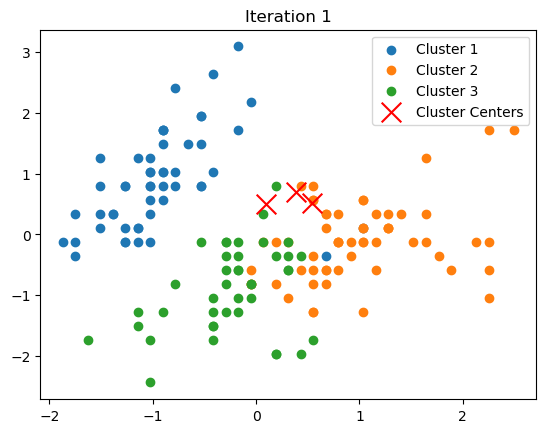

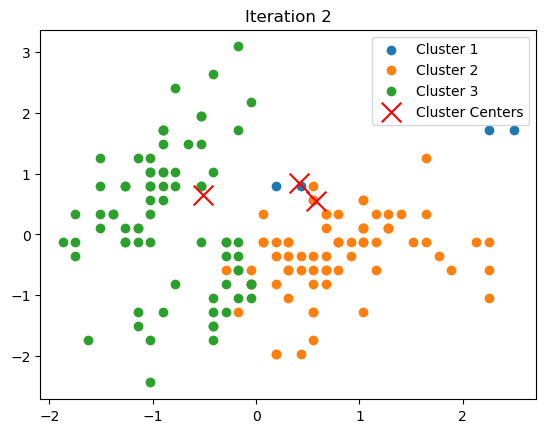

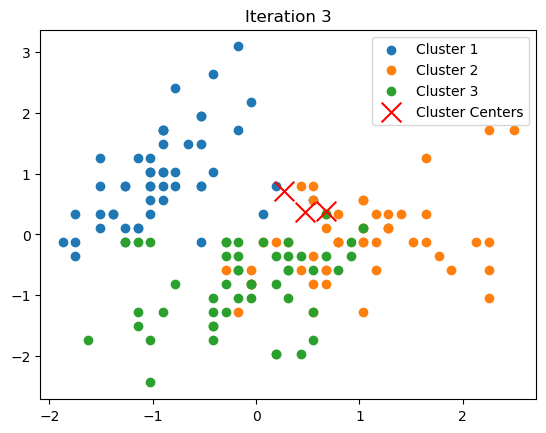

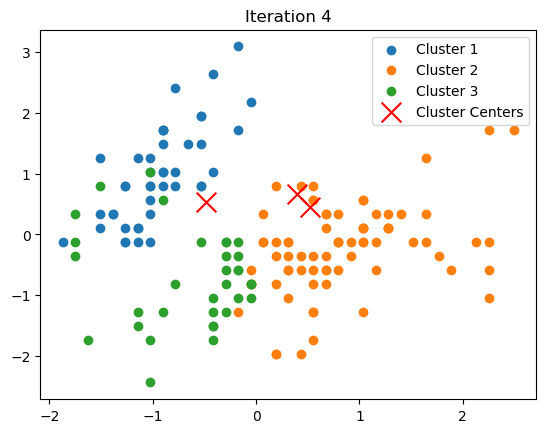

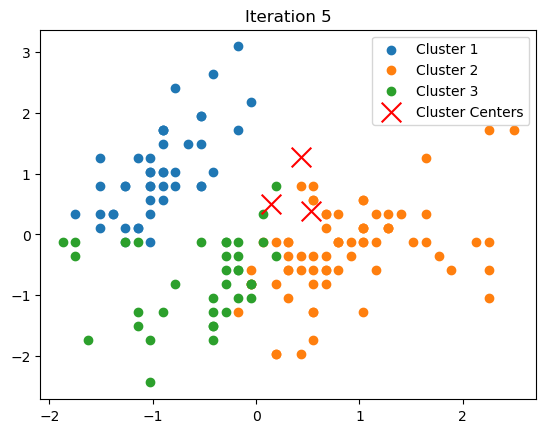

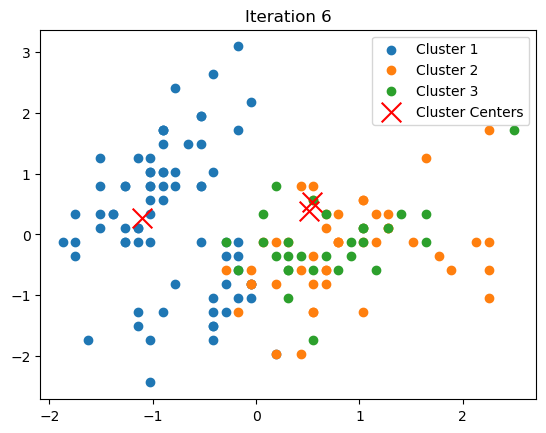

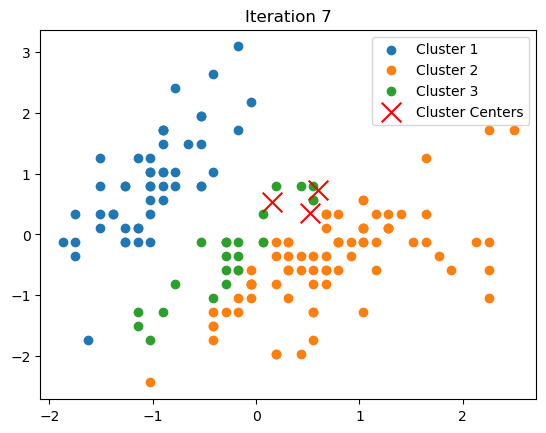

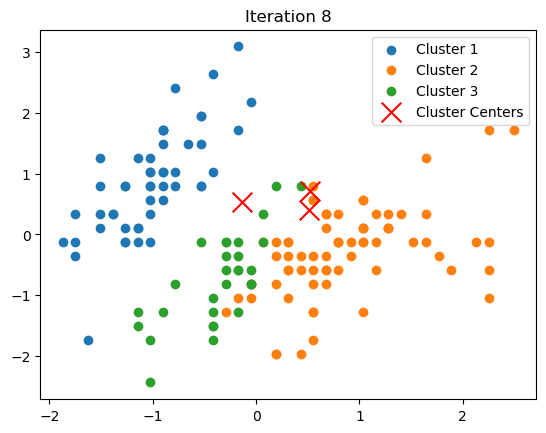

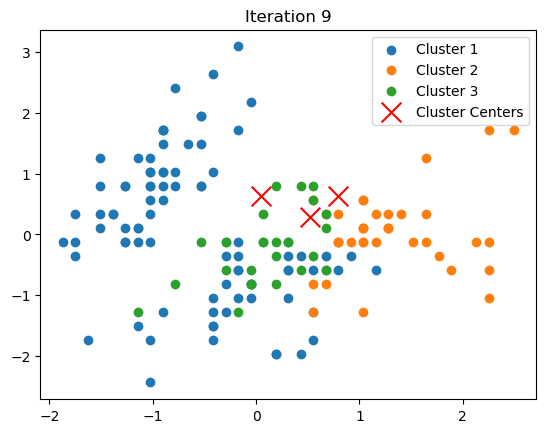

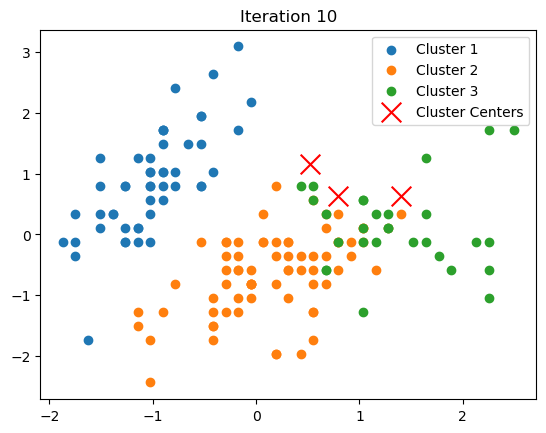

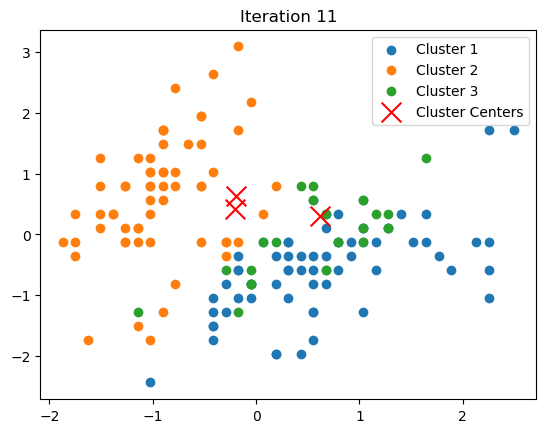

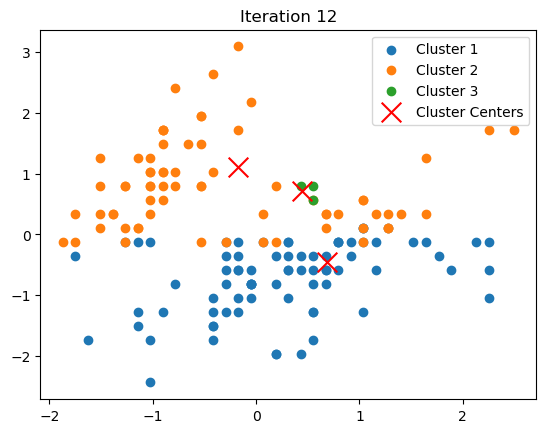

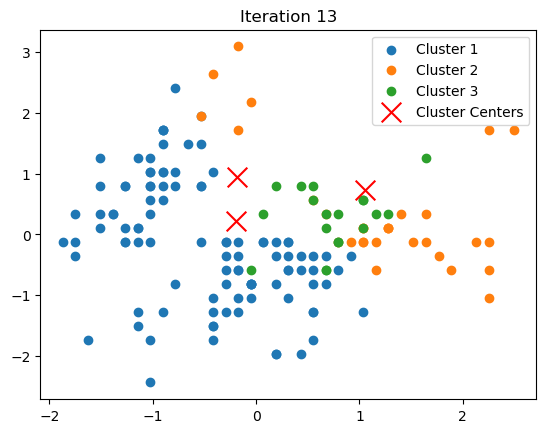

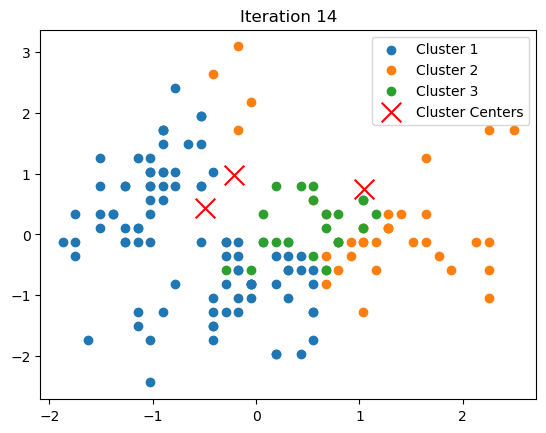

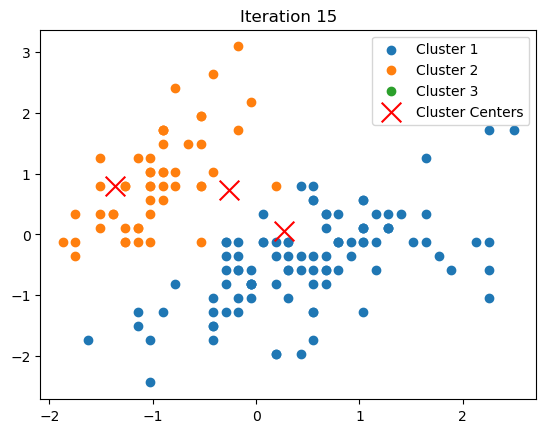

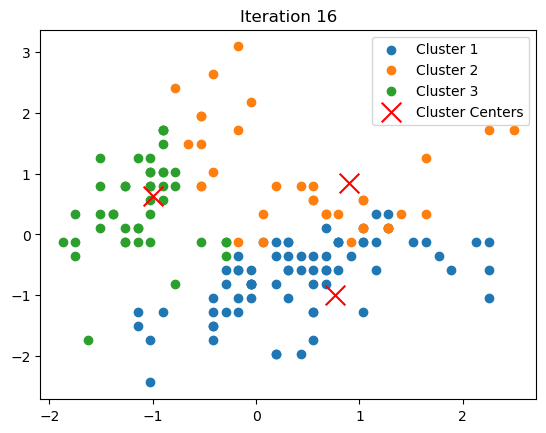

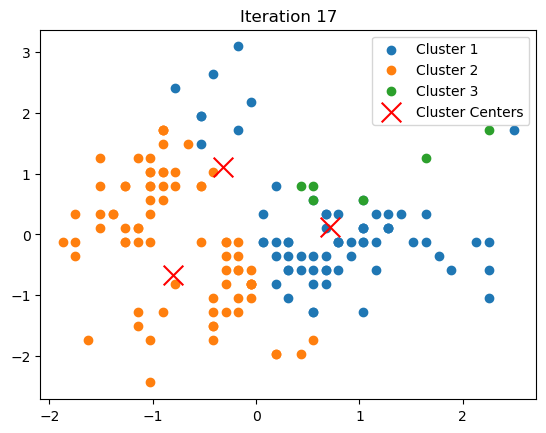

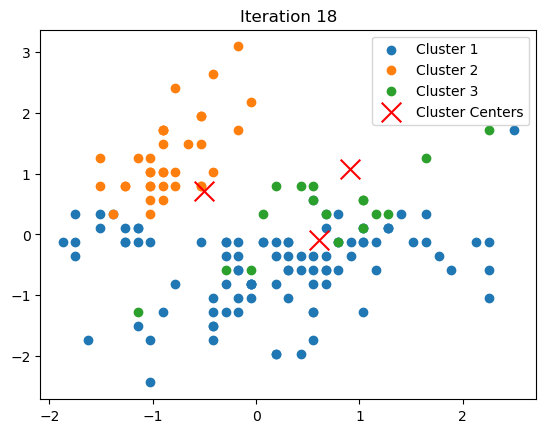

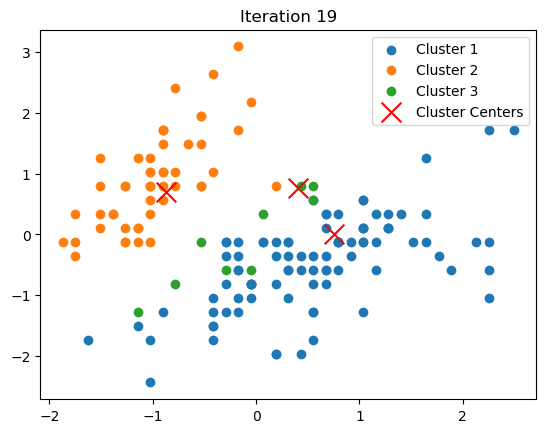

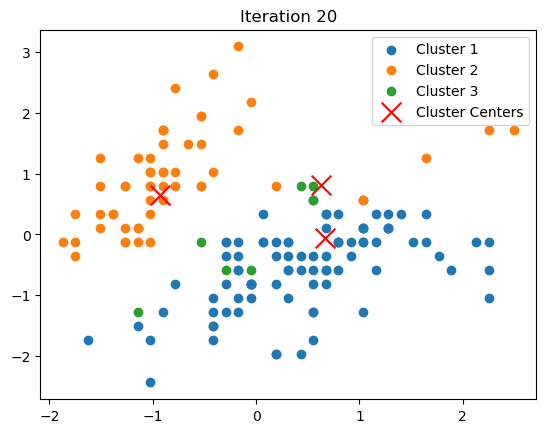

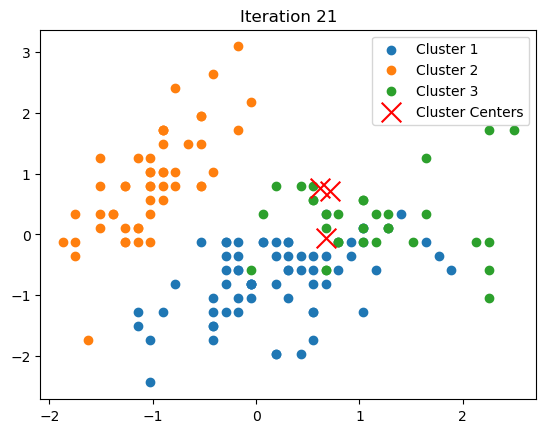

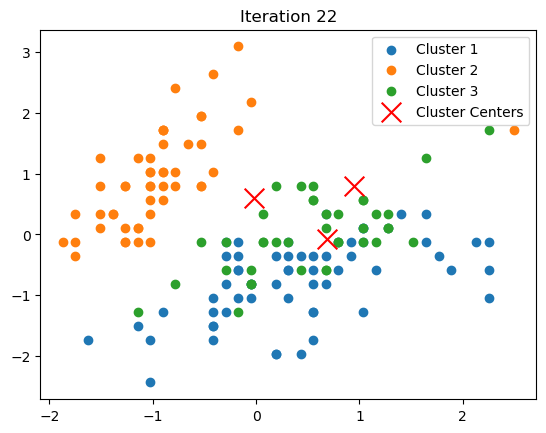

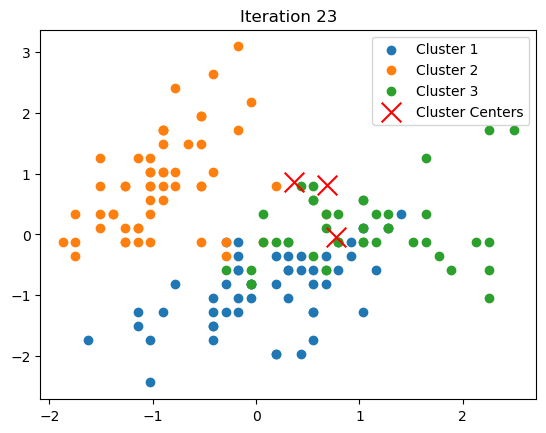

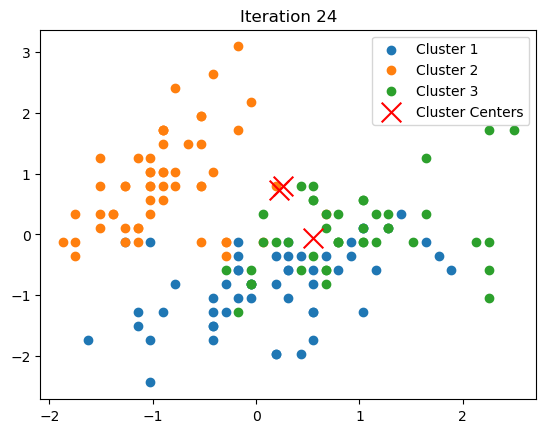

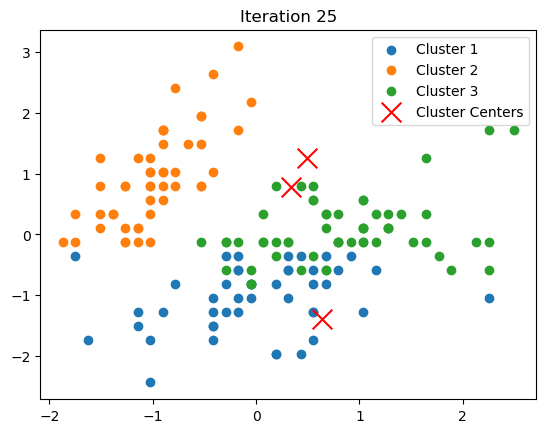

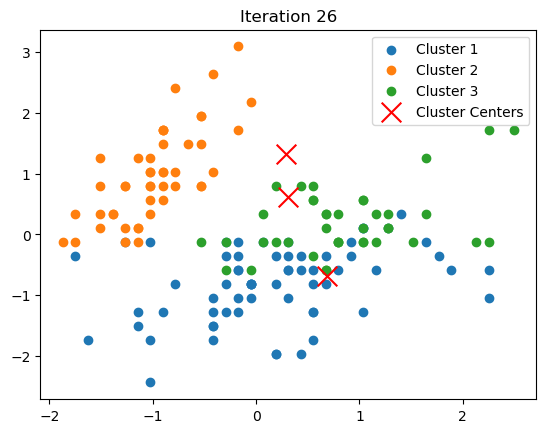

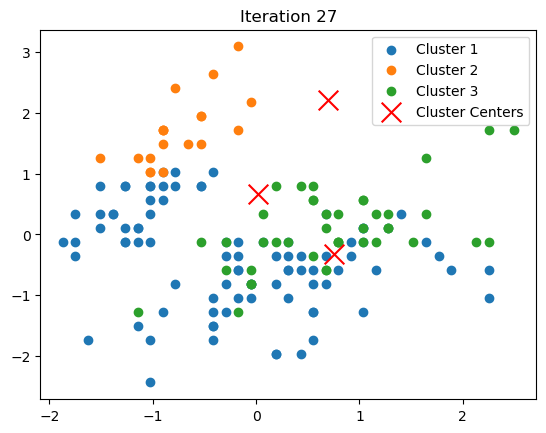

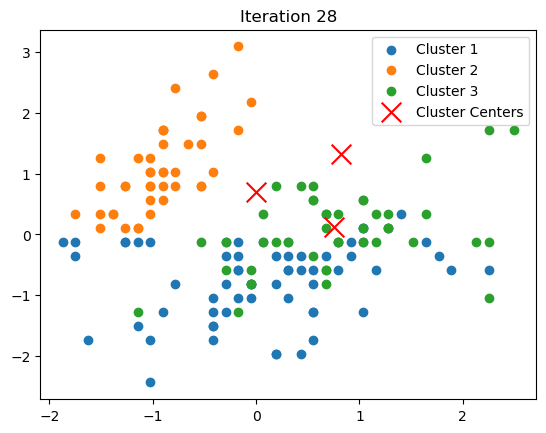

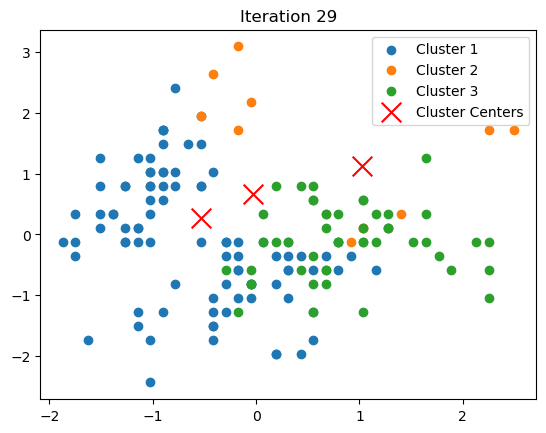

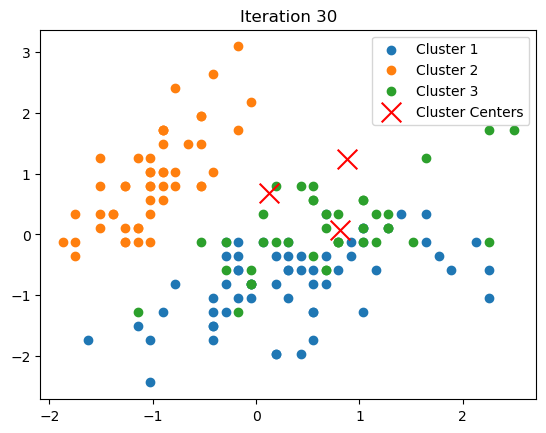

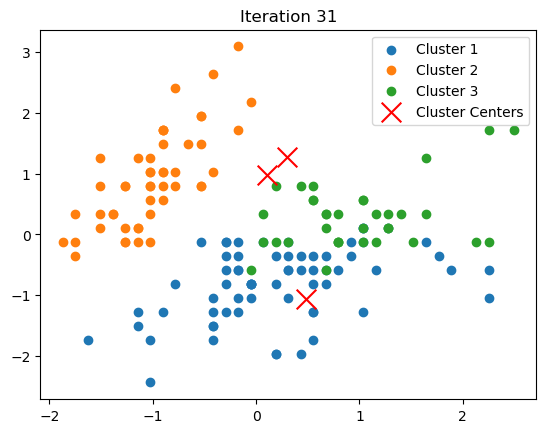

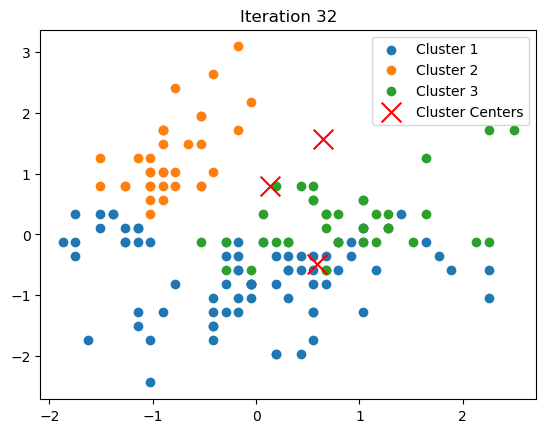

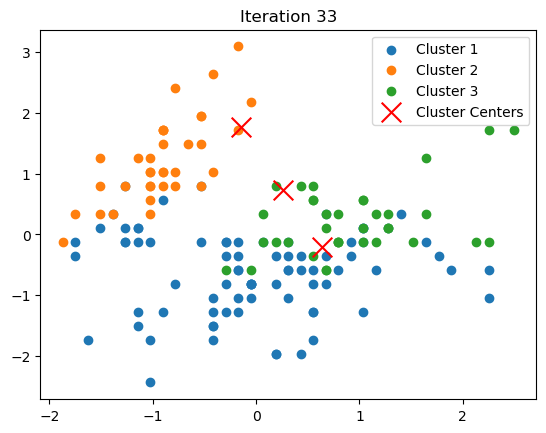

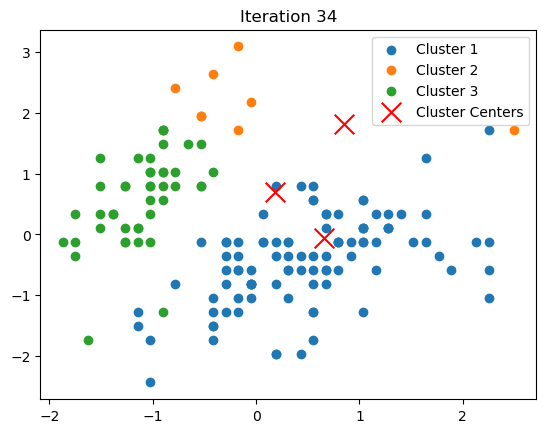

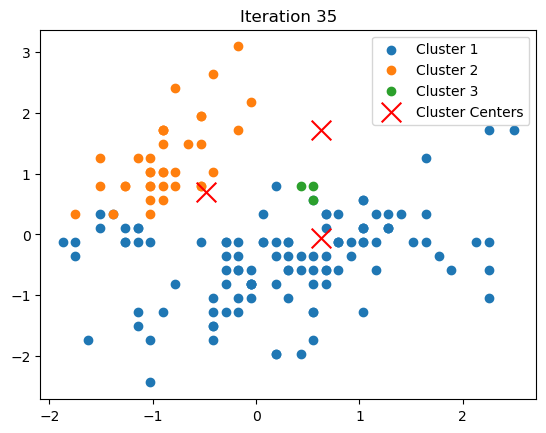

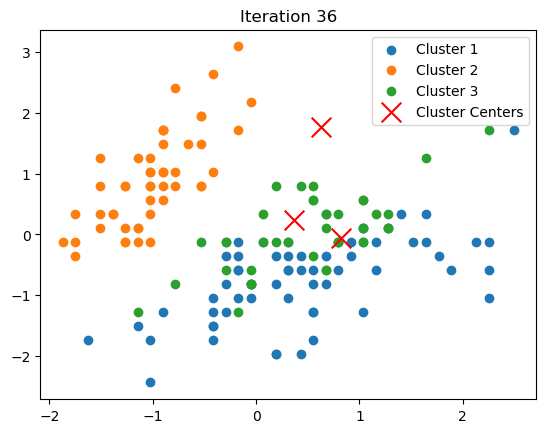

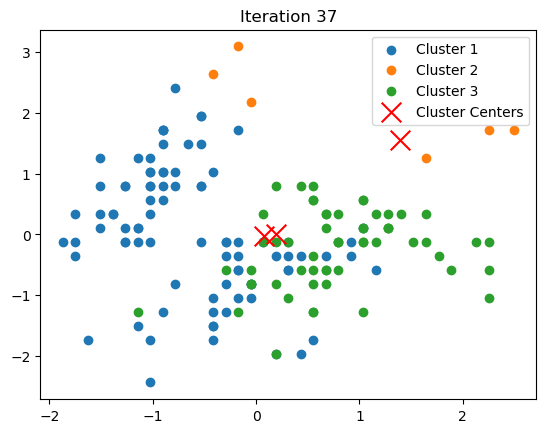

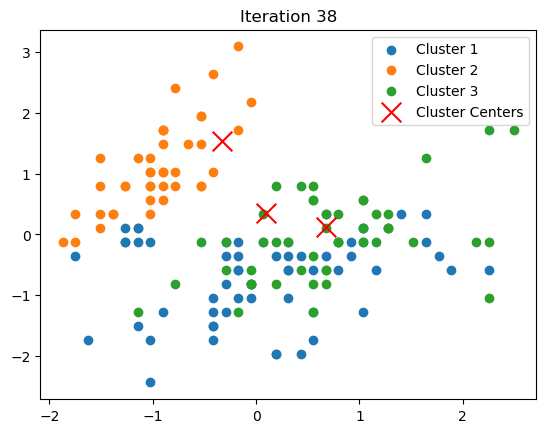

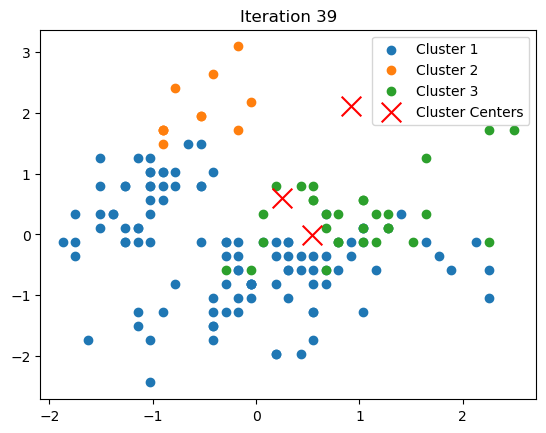

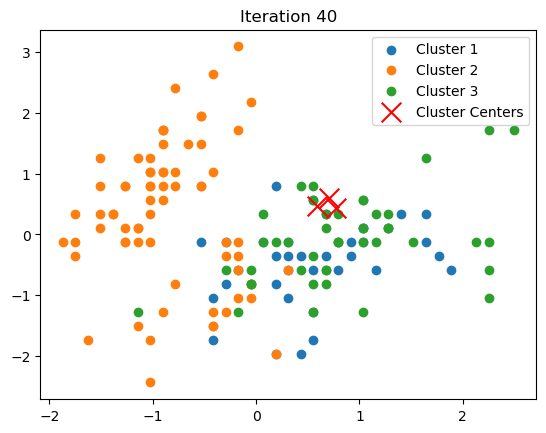

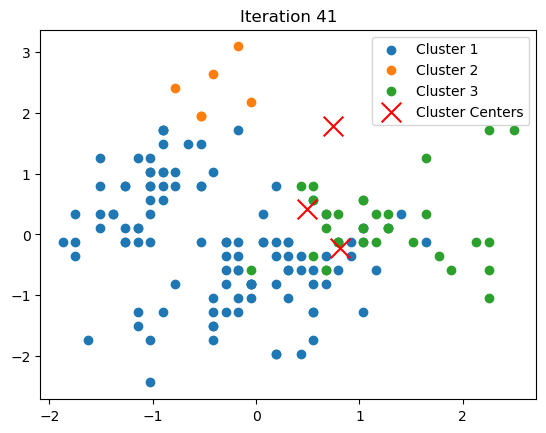

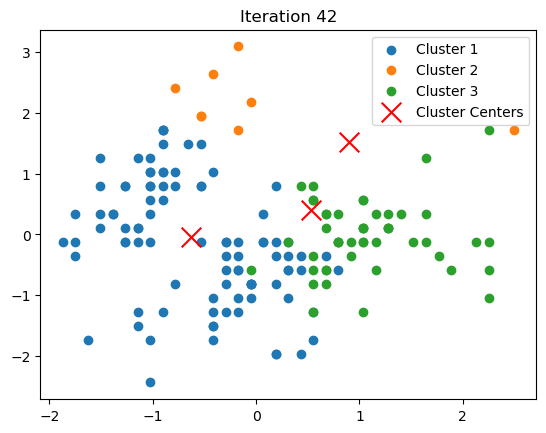

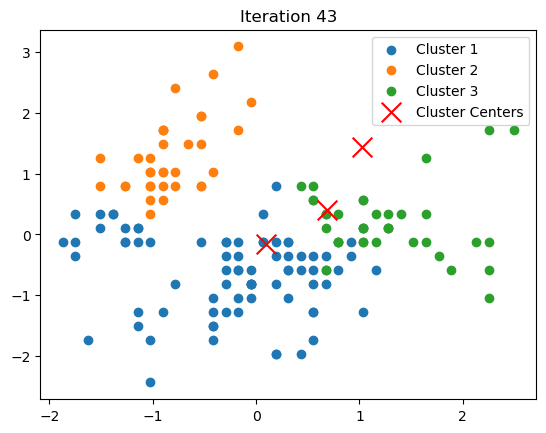

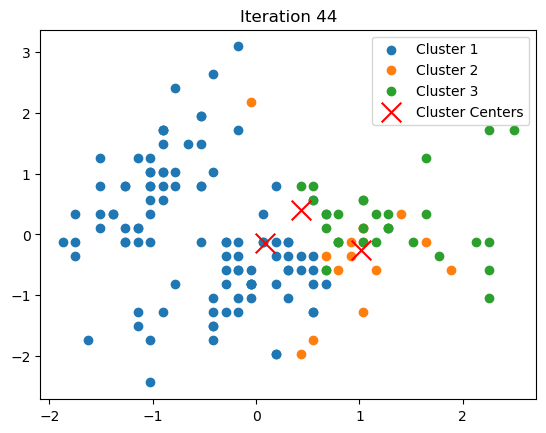

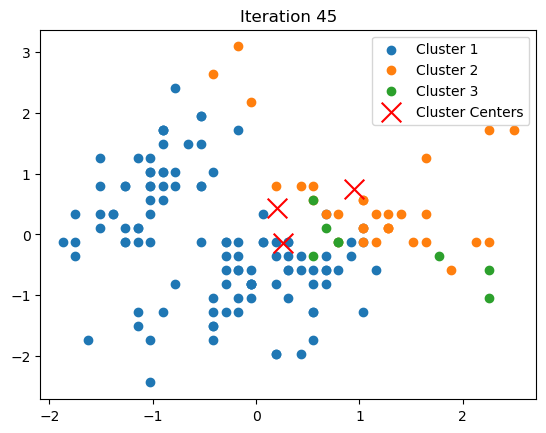

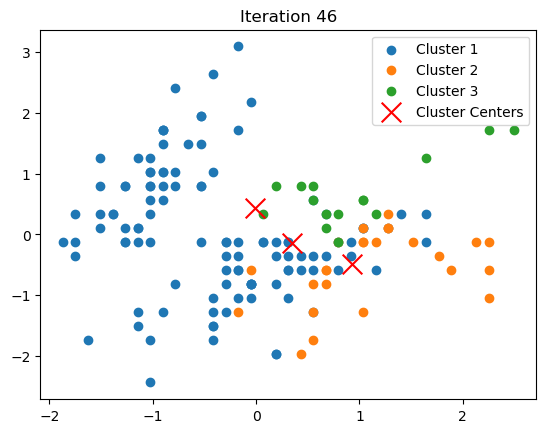

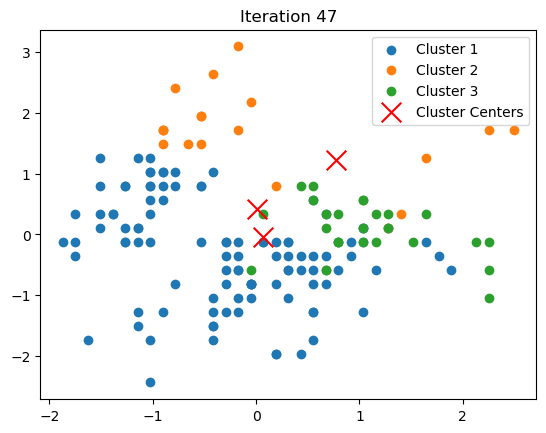

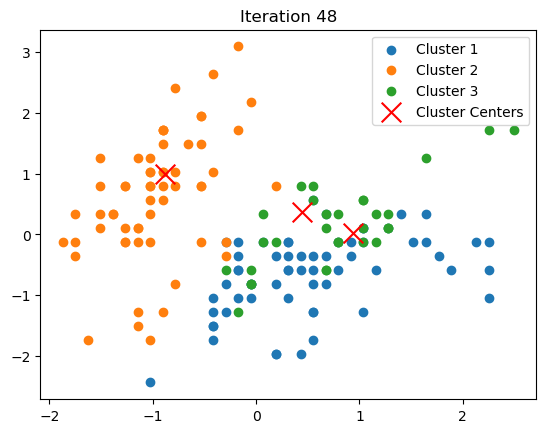

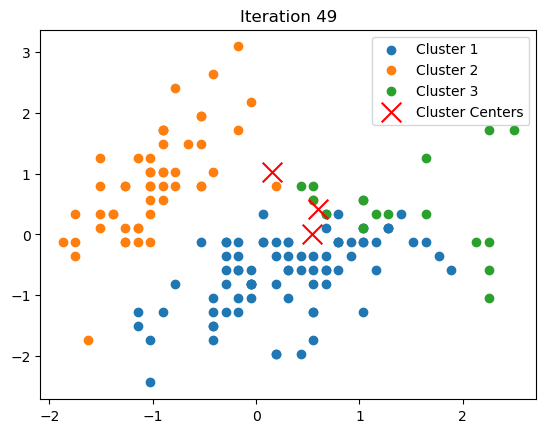

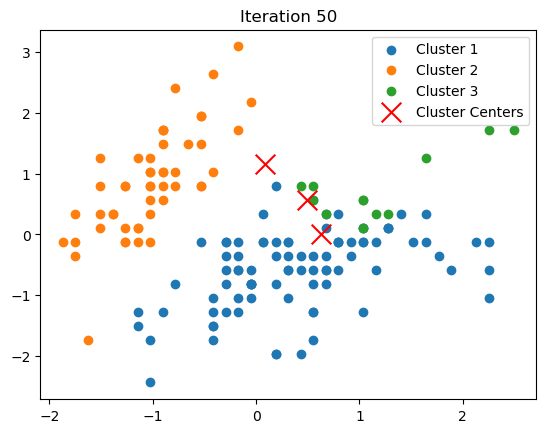

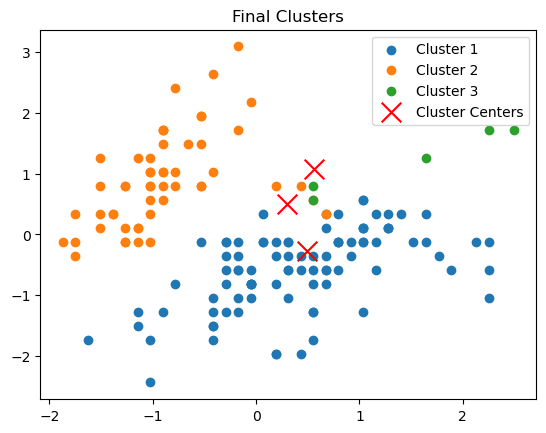

In [42]:
# Genetic Algorithm
data_dim = X_standardized.shape[1]
population = initialize_population(pop_size, num_clusters, data_dim)

for generation in range(num_generations):
    fitness_scores = [evaluate_fitness(X_standardized, cluster_centers) for cluster_centers in population]

    # Visualize clusters after each iteration
    visualize_clusters(X_standardized, population[np.argmax(fitness_scores)], f'Iteration {generation + 1}')

    # Select parents
    parents = select_parents(population, fitness_scores)

    # Create offspring through crossover
    offspring = []
    for i in range(0, len(parents), 2):
        parent1 = population[parents[i]]
        parent2 = population[parents[i + 1]]
        child = crossover(parent1, parent2)
        offspring.append(child)

    # Mutate offspring
    for i in range(len(offspring)):
        offspring[i] = mutate(offspring[i], mutation_rate)

    # Replace old population with new population
    population = np.array(offspring)

# Get the best solution
best_cluster_centers = population[np.argmax(fitness_scores)]

# Assign data points to clusters using the best cluster centers
final_clusters = assign_clusters(X_standardized, best_cluster_centers)

# Visualize final clusters
visualize_clusters(X_standardized, best_cluster_centers, 'Final Clusters')